In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
df = pd.read_excel(r"C:\Users\Michela\Desktop\microdati_2019.xlsx")

In [3]:
df.head()

,REG,RIP5,RIP3,SG11,SG16,C59,C59AB,C73,C74,CLETAS,COND3,COND10,POSPRO,DETIND,PIEPAR,LAVSPE,EDULEV,I1,COEFMI
0,19,5,3,2,1,,,,,17,3,10,,,,,6,6,2506
1,7,1,1,2,1,2,1,7,8,13,1,1,3,2,1,2,5,1,2814
2,7,1,1,1,1,,,,,14,3,8,,,,,3,6,2814
3,4,2,1,1,1,,,,,16,3,10,,,,,4,6,944
4,4,2,1,2,1,,,,,15,3,10,,,,,4,6,944


In [ ]:
# da REG 13 a 21 in range 

In [92]:
data = pd.DataFrame(df)

In [5]:
df.shape

(94121, 19)

In [8]:
print(selected_rows.dtypes)

REG        int64
SG11       int64
RIP5       int64
EDULEV    object
CLETAS     int64
COND10     int64
COEFMI     int64
dtype: object


## Calcolo tasso di occupazione e disoccupazione

In [5]:
a = round(data.groupby(by=['COND10'])['COEFMI'].sum()/10000)
a = np.array(a)
a, np.sum(a)

(array([23383.,  1256.,   621.,   696.,  1469.,   211.,  1281., 10141.,
         7888., 12915.]),
 59861.0)

In [6]:
employment_italy = a[0] / np.sum(a[0:8]) * 100
employment_italy

59.86737672179835

In [7]:
unemployment_italy = np.sum(a[1:4]) / np.sum(a[0:4]) * 100
unemployment_italy

9.912929573123748

In [8]:
# computing the activity rate in addition
activity_italy = np.sum(a[0:4]) / np.sum(a[0:8]) * 100
activity_italy 

66.45501561779918

## CALCOLO TASSO DI OCCUPAZIONE E DISOCCUPAZIONE SUD E ISOLE

In [106]:
subset = df[["REG", "SG11", "RIP5", "EDULEV", "CLETAS", "COND10", "COEFMI"]]
print(subset)

       REG  SG11  RIP5  EDULEV  CLETAS  COND10  COEFMI
0       19     2     5     6.0      17      10    2506
1        7     2     1     5.0      13       1    2814
2        7     1     1     3.0      14       8    2814
3        4     1     2     4.0      16      10     944
4        4     2     2     4.0      15      10     944
...    ...   ...   ...     ...     ...     ...     ...
94116   10     1     3     5.0      17      10    2306
94117   10     2     3     2.0      17      10    2306
94118   12     1     3     6.0       9       1   34050
94119   12     2     3     6.0       8       1   34050
94120   12     2     3     NaN       2       9   34050

[94121 rows x 7 columns]


In [10]:
d = {'1': 'Nord ovest', '2': 'Nord est', '3': 'Centro', '4': 'Sud', '5': 'Isole'}
occupazione_aree = dict()
disoccupazione_aree = dict()
attività_aree = dict()
for i in range(1,6): # in range from Nord-ovest to Isole
    a = df[(df.RIP5 == i)]
    a = a.groupby(by = ['COND10'])['COEFMI'].sum()/10000
    a = np.array(a)
    tasso_occupazione = a[0] / np.sum(a[0:8]) * 100
    tasso_disoccupazione = np.sum(a[1:4]) / np.sum(a[0:4]) * 100
    tasso_attività = np.sum(a[0:4]) / np.sum(a[0:8]) * 100
    occupazione_aree[d[str(i)]] = tasso_occupazione
    disoccupazione_aree[d[str(i)]] = tasso_disoccupazione
    attività_aree[d[str(i)]] = tasso_attività
print(f"OCCUPAZIONE: {occupazione_aree}\nDISOCCUPAZIONE: {disoccupazione_aree}\nATTIVITA': {attività_aree}")

OCCUPAZIONE: {'Nord ovest': 67.99667505341066, 'Nord est': 69.41491076292908, 'Centro': 64.36067604116708, 'Sud': 45.966119852893264, 'Isole': 45.45792347966163}
DISOCCUPAZIONE: {'Nord ovest': 6.538379956217369, 'Nord est': 5.668478800868688, 'Centro': 8.508760628739502, 'Sud': 17.212789269705926, 'Isole': 17.878101207798778}
ATTIVITA': {'Nord ovest': 72.75358058372754, 'Nord est': 73.58612463843986, 'Centro': 70.34627193101971, 'Sud': 55.523213606800525, 'Isole': 55.354204113919714}


In [11]:
rates = pd.DataFrame(list(occupazione_aree.items()), columns=['Territorio', 'Occupazione'])
rates = rates.assign(Disoccupazione = disoccupazione_aree.values(), Attività = attività_aree.values())
rates

,Territorio,Occupazione,Disoccupazione,Attività
0,Nord ovest,67.996675,6.538380,72.753581
1,Nord est,69.414911,5.668479,73.586125
2,Centro,64.360676,8.508761,70.346272
3,Sud,45.966120,17.212789,55.523214
4,Isole,45.457923,17.878101,55.354204


In [107]:
selected_rows = subset[subset['REG'] > 12]
print(selected_rows)

       REG  SG11  RIP5  EDULEV  CLETAS  COND10  COEFMI
0       19     2     5     6.0      17      10    2506
5       16     1     4     2.0      14       1   23595
6       16     2     4     2.0      12       8   23595
7       16     1     4     5.0       5       4   23595
12      15     2     4     6.0      10       1    5650
...    ...   ...   ...     ...     ...     ...     ...
94100   18     2     4     2.0      17      10    2471
94112   19     1     5     3.0      11       1    8604
94113   19     2     5     5.0      11       4    8604
94114   19     2     5     3.0       6       5    8604
94115   19     1     5     3.0       5       8    8604

[33677 rows x 7 columns]


In [108]:
reg = ['Piemonte', 'Valle d\'Aosta', 'Lombardia', 'Trentino alto Adige', 'Veneto', 'Friuli Venezia Giulia', 'Liguria', 'Emilia Romagna',
'Toscana', 'Umbria', 'Marche', 'Lazio',
'Abruzzo', 'Molise', 'Campania', 'Puglia', 'Basilicata', 'Calabria',
'Sicilia', 'Sardegna']
num = []
for i in range(1, 21):
    num.append(i)
d2 = dict()
for i, j in zip(reg, num):
    d2[str(j)] = i    
d2
employ_reg = dict()
unemploy_reg = dict()
activity_reg = dict()
for i in range(13,21):
    a = df[(df.REG == i)]
    a = a.groupby(by=['COND10'])['COEFMI'].sum()/10000
    a = np.array(a)
    employ_rate = a[0] / np.sum(a[0:8]) * 100
    unemploy_rate = np.sum(a[1:4]) / np.sum(a[0:4]) * 100
    activity_rate = np.sum(a[0:4]) / np.sum(a[0:8]) * 100
    employ_reg[d2[str(i)]] = employ_rate
    unemploy_reg[d2[str(i)]] = unemploy_rate
    activity_reg[d2[str(i)]] = activity_rate
print(f"OCCUPAZIONE SUD E ISOLE: {employ_rate}\nDISOCCUPAZIONE SUD E ISOLE: {unemploy_rate}\nATTVITA' SUD E ISOLE: {activity_rate}")

OCCUPAZIONE SUD E ISOLE: 54.1956352154895
DISOCCUPAZIONE SUD E ISOLE: 15.364025579181664
ATTVITA' SUD E ISOLE: 64.03380546671976


In [14]:
reg_tax = pd.DataFrame(list(employ_reg.items()), columns=['Territorio', 'Occupazione'])
reg_tax = reg_tax.assign(Disoccupazione = unemploy_reg.values(), Attività = activity_reg.values())
reg_tax

,Territorio,Occupazione,Disoccupazione,Attività
0,Abruzzo,59.355728,13.172441,68.360471
1,Molise,57.107129,10.363631,63.709775
2,Campania,41.903439,20.373856,52.625228
3,Puglia,46.644358,14.609806,54.624958
4,Basilicata,51.973099,9.519878,57.441455
5,Calabria,44.693036,20.094247,55.932188
6,Sicilia,42.577865,18.888953,52.493299
7,Sardegna,54.195635,15.364026,64.033805


Text(0, 0.5, 'Tasso di occupazione')

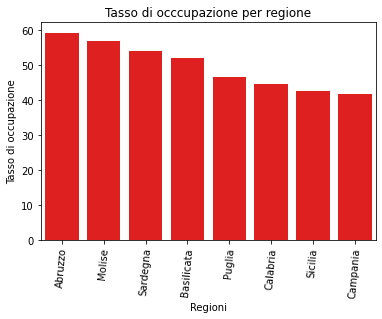

In [15]:
sns.barplot(data = reg_tax, x = 'Territorio', y = 'Occupazione', color='red', 
    order=reg_tax.sort_values(by=['Occupazione'], ascending=False).set_index('Territorio').index).set_title('Tasso di occcupazione per regione')
plt.xticks(rotation=85)
plt.xlabel('Regioni')
plt.ylabel('Tasso di occupazione')
#sns.set(rc = {'figure.figsize':(15, 10)})

Text(0, 0.5, 'Tasso di disoccupazione')

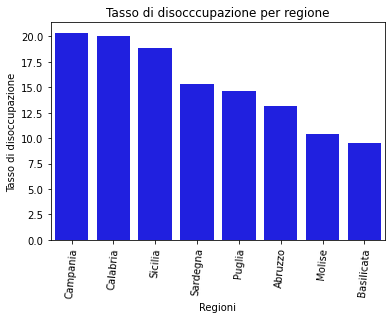

In [16]:
sns.barplot(data = reg_tax, x = 'Territorio', y = 'Disoccupazione', color='blue', 
    order=reg_tax.sort_values(by=['Disoccupazione'], ascending=False).set_index('Territorio').index).set_title('Tasso di disocccupazione per regione')
plt.xticks(rotation=85)
plt.xlabel('Regioni')
plt.ylabel('Tasso di disoccupazione')
#sns.set(rc = {'figure.figsize':(15, 10)})

## Analisi dei tassi rispetto al genere

In [17]:
d = {'1': 'Nord ovest', '2': 'Nord est', '3': 'Centro', '4': 'Sud', '5': 'Isole'}
employ_m = dict()
unemploy_m = dict()
activity_m = dict()
for i in range(1,6):
    a = df[((df.RIP5 == i) & (df.SG11 == 1))] # SG11 = 1 MEN
    a = a.groupby(by = ['COND10'])['COEFMI'].sum()/10000
    a = np.array(a)
    employ_sex = a[0] / np.sum(a[0:8]) * 100
    unemploy_sex = np.sum(a[1:4]) / np.sum(a[0:4]) * 100
    activity_sex = np.sum(a[0:4]) / np.sum(a[0:8]) * 100
    employ_m[d[str(i)]] = employ_sex
    unemploy_m[d[str(i)]] = unemploy_sex
    activity_m[d[str(i)]] = activity_sex
sex_m = pd.DataFrame(list(employ_m.items()), columns=['Territorio', 'Occupazione'])
sex = sex_m.assign(Disoccupazione = unemploy_m.values(), Attività = activity_m.values())
print("Tassi per il genere maschile")
sex

Tassi per il genere maschile


,Territorio,Occupazione,Disoccupazione,Attività
0,Nord ovest,75.505184,5.035043,79.508470
1,Nord est,76.396334,4.720067,80.180928
2,Centro,72.256153,7.281797,77.930925
3,Sud,58.864125,15.531716,69.687843
4,Isole,56.122746,15.746118,66.611466


In [18]:
d = {'1': 'Nord ovest', '2': 'Nord est', '3': 'Centro', '4': 'Sud', '5': 'Isole'}
sex_employ = dict()
sex_unemploy = dict()
sex_activity = dict()
for i in range(1,6):
    a = df[((df.RIP5 == i) & (df.SG11 == 2))] # SG11 = 2 WOMEN
    a = a.groupby(by = ['COND10'])['COEFMI'].sum()/10000
    a = np.array(a)
    rate_sex = a[0] / np.sum(a[0:8]) * 100
    rate_no = np.sum(a[1:4]) / np.sum(a[0:4]) * 100
    act_rate = np.sum(a[0:4]) / np.sum(a[0:8]) * 100
    sex_employ[d[str(i)]] = rate_sex
    sex_unemploy[d[str(i)]] = rate_no
    sex_activity[d[str(i)]] = act_rate
rate_sex = pd.DataFrame(list(sex_employ.items()), columns=['Territorio', 'Occupazione'])
tax_f = rate_sex.assign(Disoccupazione = sex_unemploy.values(), Attività = sex_activity.values())
print("Tassi per il genere femminile")
tax_f

Tassi per il genere femminile


,Territorio,Occupazione,Disoccupazione,Attività
0,Nord ovest,60.316088,8.395307,65.843885
1,Nord est,62.308993,6.825893,66.873721
2,Centro,56.528901,10.018514,62.822813
3,Sud,33.084324,20.040565,41.376386
4,Isole,34.789712,21.099894,44.093365


In [136]:
reg = ['Piemonte', 'Valle d\'Aosta', 'Lombardia', 'Trentino alto Adige', 'Veneto', 'Friuli Venezia Giulia', 'Liguria', 'Emilia Romagna',
'Toscana', 'Umbria', 'Marche', 'Lazio',
'Abruzzo', 'Molise', 'Campania', 'Puglia', 'Basilicata', 'Calabria',
'Sicilia', 'Sardegna']
num = []
for i in range(1, 21):
    num.append(i)
d2 = dict()
for i, j in zip(reg, num):
    d2[str(j)] = i    
d2
employ_reg = dict()
unemploy_reg = dict()
activity_reg = dict()
for i in range(13,21):
    a = df[((df.REG == i) & (df.SG11 == 2))]
    a = a.groupby(by=['COND10'])['COEFMI'].sum()/10000
    a = np.array(a)
    employ_rate_f = a[0] / np.sum(a[0:8]) * 100
    unemploy_rate_f = np.sum(a[1:4]) / np.sum(a[0:4]) * 100
    activity_rate_f = np.sum(a[0:4]) / np.sum(a[0:8]) * 100
    employ_reg[d2[str(i)]] = employ_rate_f
    unemploy_reg[d2[str(i)]] = unemploy_rate_f
    activity_reg[d2[str(i)]] = activity_rate_f
print(f"OCCUPAZIONE FEMMINILE SUD E ISOLE: {employ_rate_f}\nDISOCCUPAZIONE FEMMINILE SUD E ISOLE: {unemploy_rate_f}\nATTVITA' FEMMINILE SUD E ISOLE: {activity_rate_f}")
sex_r = pd.DataFrame(list(employ_reg.items()), columns=['Territorio', 'Occupazione'])
tax_f = sex_r.assign(Disoccupazione = unemploy_reg.values(), Attività = activity_reg.values())
tax_f

OCCUPAZIONE FEMMINILE SUD E ISOLE: 48.16510947312933
DISOCCUPAZIONE FEMMINILE SUD E ISOLE: 16.089547866795797
ATTVITA' FEMMINILE SUD E ISOLE: 57.40060772961789


,Territorio,Occupazione,Disoccupazione,Attività
0,Abruzzo,48.831374,16.225373,58.288979
1,Molise,47.614606,10.420646,53.153548
2,Campania,28.463799,24.828905,37.865351
3,Puglia,32.800830,17.475969,39.747004
4,Basilicata,39.076180,13.073197,44.952970
5,Calabria,33.541225,19.230904,41.527300
6,Sicilia,30.476998,23.429682,39.802627
7,Sardegna,48.165109,16.089548,57.400608


In [109]:
reg = ['Piemonte', 'Valle d\'Aosta', 'Lombardia', 'Trentino alto Adige', 'Veneto', 'Friuli Venezia Giulia', 'Liguria', 'Emilia Romagna',
'Toscana', 'Umbria', 'Marche', 'Lazio',
'Abruzzo', 'Molise', 'Campania', 'Puglia', 'Basilicata', 'Calabria',
'Sicilia', 'Sardegna']
num = []
for i in range(1, 21):
    num.append(i)
d2 = dict()
for i, j in zip(reg, num):
    d2[str(j)] = i    
d2
employ_reg = dict()
unemploy_reg = dict()
activity_reg = dict()
for i in range(13,21):
    a = df[((df.REG == i) & (df.SG11 == 1))]
    a = a.groupby(by=['COND10'])['COEFMI'].sum()/10000
    a = np.array(a)
    employ_rate_m = a[0] / np.sum(a[0:8]) * 100
    unemploy_rate_m = np.sum(a[1:4]) / np.sum(a[0:4]) * 100
    activity_rate_m = np.sum(a[0:4]) / np.sum(a[0:8]) * 100
    employ_reg[d2[str(i)]] = employ_rate_m
    unemploy_reg[d2[str(i)]] = unemploy_rate_m
    activity_reg[d2[str(i)]] = activity_rate_m
print(f"OCCUPAZIONE MASCHILE SUD E ISOLE: {employ_rate_m}\nDISOCCUPAZIONE MASCHILE SUD E ISOLE: {unemploy_rate_m}\nATTVITA' MASCHILE SUD E ISOLE: {activity_rate_m}")
sex_r = pd.DataFrame(list(employ_reg.items()), columns=['Territorio', 'Occupazione'])
tax_m = sex_r.assign(Disoccupazione = unemploy_reg.values(), Attività = activity_reg.values())
tax_m

OCCUPAZIONE MASCHILE SUD E ISOLE: 60.02899003572837
DISOCCUPAZIONE MASCHILE SUD E ISOLE: 14.792219612883702
ATTVITA' MASCHILE SUD E ISOLE: 70.45012763271669


,Territorio,Occupazione,Disoccupazione,Attività
0,Abruzzo,69.877671,10.904019,78.429656
1,Molise,66.334584,10.323805,73.971230
2,Campania,55.459725,17.853518,67.513208
3,Puglia,60.499990,12.969592,69.515921
4,Basilicata,64.565927,7.280129,69.635479
5,Calabria,55.758207,20.600814,70.225162
6,Sicilia,54.806870,16.092698,65.318356
7,Sardegna,60.028990,14.792220,70.450128


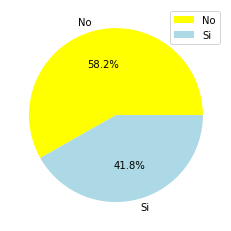

In [186]:
plt.pie([tax_m.iloc[1,1], tax_f.iloc[1,1]], labels = ['No', 'Si'], autopct='%1.1f%%', colors = ['yellow', 'lightblue'])
plt.legend()

Text(0, 0.5, 'Tasso di disoccupazione')

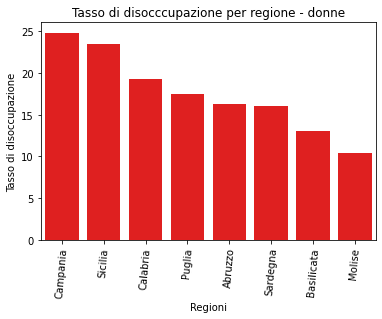

In [139]:
tax_reg = tax_f
sns.barplot(data = tax_reg, x = 'Territorio', y = 'Disoccupazione', color='red', 
    order=tax_reg.sort_values(by=['Disoccupazione'], ascending=False).set_index('Territorio').index).set_title('Tasso di disocccupazione per regione - donne')
plt.xticks(rotation=85)
plt.xlabel('Regioni')
plt.ylabel('Tasso di disoccupazione')

Text(0, 0.5, 'Tasso di occupazione')

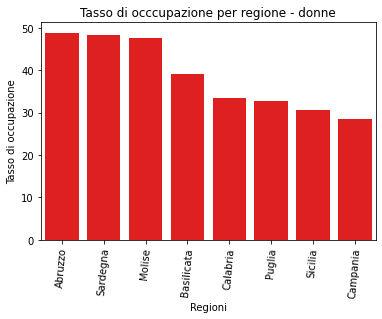

In [22]:
tax_reg = tax_f[-8:]
sns.barplot(data = tax_reg, x = 'Territorio', y = 'Occupazione', color='red', 
    order=tax_reg.sort_values(by=['Occupazione'], ascending=False).set_index('Territorio').index).set_title('Tasso di occcupazione per regione - donne')
plt.xticks(rotation=85)
plt.xlabel('Regioni')
plt.ylabel('Tasso di occupazione')

## Analisi dei tassi rispetto al livello di istruzione

In [88]:
titoli = ['nessun titolo', 'licenza elementare', 'licenza media', 'qualifica superiori', 'diploma superiori', 'laurea']
numeri = []
for i in range(1, 7):
    numeri.append(i)
d3 = dict()
for i, j in zip(titoli, numeri):
    d3[str(j)] = i    
d3

{'1': 'nessun titolo',
 '2': 'licenza elementare',
 '3': 'licenza media',
 '4': 'qualifica superiori',
 '5': 'diploma superiori',
 '6': 'laurea'}

In [93]:
data['EDULEV'].unique() # changing into NaN all the missing values 

array([6, 5, 3, 4, 2, ' ', 1], dtype=object)

In [94]:
data['EDULEV'] = pd.to_numeric(data['EDULEV'], errors='coerce')

In [95]:
d = {'1': 'Nord ovest', '2': 'Nord est', '3': 'Centro', '4': 'Sud', '5': 'Isole'}
edu_employ = dict()
edu_unemploy = dict()
edu_activity = dict()
for i in range(1,6):
    a = df[((df.RIP5 == i) & (df.EDULEV == 1))]
    a = a.groupby(by = ['COND10'])['COEFMI'].sum()/10000
    a = np.array(a)
    edu_employ_rate = a[0] / np.sum(a[0:8]) * 100
    edu_unemploy_rate = np.sum(a[1:4]) / np.sum(a[0:4]) * 100
    edu_activity_rate = np.sum(a[0:4]) / np.sum(a[0:8]) * 100
    edu_employ[d[str(i)]] = edu_employ_rate
    edu_unemploy[d[str(i)]] = edu_unemploy_rate
    edu_activity[d[str(i)]] = edu_activity_rate
    
print('\n tassi nessun titolo \n')

edu_tax = pd.DataFrame(list(edu_employ.items()), columns=['Territorio', 'Occupazione'])
noedu_tax = edu_tax.assign(Disoccupazione = edu_unemploy.values(), Attività = edu_activity.values())
noedu_tax


 tassi nessun titolo 



,Territorio,Occupazione,Disoccupazione,Attività
0,Nord ovest,8.676398,28.520521,12.138307
1,Nord est,8.011851,16.289413,9.570893
2,Centro,17.074453,11.308939,19.251606
3,Sud,5.638691,24.292810,7.448025
4,Isole,27.991360,24.001572,36.831499


In [96]:
d = {'1': 'Nord ovest', '2': 'Nord est', '3': 'Centro', '4': 'Sud', '5': 'Isole'}
edu_employ = dict()
edu_unemploy = dict()
edu_activity = dict()
for i in range(1,6):
    a = df[((df.RIP5 == i) & (df.EDULEV == 2))]
    a = a.groupby(by = ['COND10'])['COEFMI'].sum()/10000
    a = np.array(a)
    edu_employ_rate = a[0] / np.sum(a[0:8]) * 100
    edu_unemploy_rate = np.sum(a[1:4]) / np.sum(a[0:4]) * 100
    edu_activity_rate = np.sum(a[0:4]) / np.sum(a[0:8]) * 100
    edu_employ[d[str(i)]] = edu_employ_rate
    edu_unemploy[d[str(i)]] = edu_unemploy_rate
    edu_activity[d[str(i)]] = edu_activity_rate
    
print('\n tassi licenza elementare \n')

edu_tax = pd.DataFrame(list(edu_employ.items()), columns=['Territorio', 'Occupazione'])
elem_tax = edu_tax.assign(Disoccupazione = edu_unemploy.values(), Attività = edu_activity.values())
elem_tax


 tassi licenza elementare 



,Territorio,Occupazione,Disoccupazione,Attività
0,Nord ovest,5.590649,21.380569,7.111027
1,Nord est,7.155218,11.996727,8.130627
2,Centro,52.099088,9.520077,57.580827
3,Sud,26.808287,21.422223,34.116881
4,Isole,27.614136,25.287259,36.960411


In [97]:
d = {'1': 'Nord ovest', '2': 'Nord est', '3': 'Centro', '4': 'Sud', '5': 'Isole'}
edu_employ = dict()
edu_unemploy = dict()
edu_activity = dict()
for i in range(1,6):
    a = df[((df.RIP5 == i) & (df.EDULEV == 3))]
    a = a.groupby(by = ['COND10'])['COEFMI'].sum()/10000
    a = np.array(a)
    edu_employ_rate = a[0] / np.sum(a[0:8]) * 100
    edu_unemploy_rate = np.sum(a[1:4]) / np.sum(a[0:4]) * 100
    edu_activity_rate = np.sum(a[0:4]) / np.sum(a[0:8]) * 100
    edu_employ[d[str(i)]] = edu_employ_rate
    edu_unemploy[d[str(i)]] = edu_unemploy_rate
    edu_activity[d[str(i)]] = edu_activity_rate
    
print('\n tassi licenza media \n')

edu_tax = pd.DataFrame(list(edu_employ.items()), columns=['Territorio', 'Occupazione'])
media_tax = edu_tax.assign(Disoccupazione = edu_unemploy.values(), Attività = edu_activity.values())
media_tax


 tassi licenza media 



,Territorio,Occupazione,Disoccupazione,Attività
0,Nord ovest,56.587191,8.028646,61.526973
1,Nord est,54.064216,8.167156,58.872418
2,Centro,51.883550,9.350444,57.235305
3,Sud,37.221450,19.769804,46.393318
4,Isole,35.007163,20.906207,44.260317


In [98]:
d = {'1': 'Nord ovest', '2': 'Nord est', '3': 'Centro', '4': 'Sud', '5': 'Isole'}
edu_employ = dict()
edu_unemploy = dict()
edu_activity = dict()
for i in range(1,6):
    a = df[((df.RIP5 == i) & (df.EDULEV == 4))]
    a = a.groupby(by = ['COND10'])['COEFMI'].sum()/10000
    a = np.array(a)
    edu_employ_rate = a[0] / np.sum(a[0:8]) * 100
    edu_unemploy_rate = np.sum(a[1:4]) / np.sum(a[0:4]) * 100
    edu_activity_rate = np.sum(a[0:4]) / np.sum(a[0:8]) * 100
    edu_employ[d[str(i)]] = edu_employ_rate
    edu_unemploy[d[str(i)]] = edu_unemploy_rate
    edu_activity[d[str(i)]] = edu_activity_rate
    
print('\n tassi licenza superiori \n')

edu_tax = pd.DataFrame(list(edu_employ.items()), columns=['Territorio', 'Occupazione'])
super_tax = edu_tax.assign(Disoccupazione = edu_unemploy.values(), Attività = edu_activity.values())
super_tax


 tassi licenza superiori 



,Territorio,Occupazione,Disoccupazione,Attività
0,Nord ovest,73.244023,5.910964,77.845438
1,Nord est,76.395032,5.525988,80.863541
2,Centro,66.650740,10.211923,74.231169
3,Sud,60.579773,13.318489,69.887767
4,Isole,50.860557,17.896810,61.947114


In [99]:
d = {'1': 'Nord ovest', '2': 'Nord est', '3': 'Centro', '4': 'Sud', '5': 'Isole'}
edu_employ = dict()
edu_unemploy = dict()
edu_activity = dict()
for i in range(1,6):
    a = df[((df.RIP5 == i) & (df.EDULEV == 5))]
    a = a.groupby(by = ['COND10'])['COEFMI'].sum()/10000
    a = np.array(a)
    edu_employ_rate = a[0] / np.sum(a[0:8]) * 100
    edu_unemploy_rate = np.sum(a[1:4]) / np.sum(a[0:4]) * 100
    edu_activity_rate = np.sum(a[0:4]) / np.sum(a[0:8]) * 100
    edu_employ[d[str(i)]] = edu_employ_rate
    edu_unemploy[d[str(i)]] = edu_unemploy_rate
    edu_activity[d[str(i)]] = edu_activity_rate
    
print('\n tassi diploma superiori \n')

edu_tax = pd.DataFrame(list(edu_employ.items()), columns=['Territorio', 'Occupazione'])
diploma_tax = edu_tax.assign(Disoccupazione = edu_unemploy.values(), Attività = edu_activity.values())
diploma_tax


 tassi diploma superiori 



,Territorio,Occupazione,Disoccupazione,Attività
0,Nord ovest,72.226416,6.984887,77.650195
1,Nord est,75.392295,4.721758,79.128555
2,Centro,65.421883,9.927359,72.632358
3,Sud,49.406093,17.823543,60.121956
4,Isole,50.650899,18.320355,62.011654


In [100]:
d = {'1': 'Nord ovest', '2': 'Nord est', '3': 'Centro', '4': 'Sud', '5': 'Isole'}
edu_employ = dict()
edu_unemploy = dict()
edu_activity = dict()
for i in range(1,6):
    a = df[((df.RIP5 == i) & (df.EDULEV == 6))]
    a = a.groupby(by = ['COND10'])['COEFMI'].sum()/10000
    a = np.array(a)
    edu_employ_rate = a[0] / np.sum(a[0:8]) * 100
    edu_unemploy_rate = np.sum(a[1:4]) / np.sum(a[0:4]) * 100
    edu_activity_rate = np.sum(a[0:4]) / np.sum(a[0:8]) * 100
    edu_employ[d[str(i)]] = edu_employ_rate
    edu_unemploy[d[str(i)]] = edu_unemploy_rate
    edu_activity[d[str(i)]] = edu_activity_rate
    
print('\n tassi laurea \n')

edu_tax = pd.DataFrame(list(edu_employ.items()), columns=['Territorio', 'Occupazione'])
laurea_tax = edu_tax.assign(Disoccupazione = edu_unemploy.values(), Attività = edu_activity.values())
laurea_tax


 tassi laurea 



,Territorio,Occupazione,Disoccupazione,Attività
0,Nord ovest,83.722429,3.237226,86.523387
1,Nord est,83.553662,3.997394,87.032702
2,Centro,81.581636,5.016174,85.890029
3,Sud,70.195831,11.251116,79.094888
4,Isole,72.100176,10.185923,80.277144


In [ ]:
# fare stessa cosa per regioni

Text(0, 0.5, 'Tasso di disoccupazione')

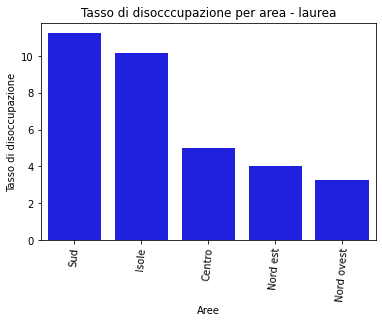

In [133]:
reg_tax = laurea_tax
sns.barplot(data = reg_tax, x = 'Territorio', y = 'Disoccupazione', color='blue', 
    order= reg_tax.sort_values(by=['Disoccupazione'], ascending=False).set_index('Territorio').index).set_title('Tasso di disocccupazione per area - laurea')
plt.xticks(rotation=85)
plt.xlabel('Aree')
plt.ylabel('Tasso di disoccupazione')

In [126]:
occupazione_regioni_istruzione = dict()
disoccupazione_regioni_istruzione = dict()
attività_regioni_istruzione = dict()
for i in range(13,21):
    a = df[((df.REG == i) & (df.EDULEV == 1))]
    a = a.groupby(by=['COND10'])['COEFMI'].sum()/10000
    a = np.array(a)
    edu_employ_rate = a[0] / np.sum(a[0:8]) * 100
    edu_unemploy_rate = np.sum(a[1:4]) / np.sum(a[0:4]) * 100
    edu_activity_rate = np.sum(a[0:4]) / np.sum(a[0:8]) * 100
    occupazione_regioni_istruzione[d2[str(i)]] = edu_employ_rate
    disoccupazione_regioni_istruzione[d2[str(i)]] = edu_unemploy_rate
    attività_regioni_istruzione[d2[str(i)]] = edu_activity_rate
print(occupazione_regioni_istruzione, disoccupazione_regioni_istruzione, attività_regioni_istruzione)

print('\n tassi nessun titolo \n')

tassi_regioni_istruzione = pd.DataFrame(list(occupazione_regioni_istruzione.items()), columns=['Territorio', 'Occupazione'])
tassi_regioni_nessuno = tassi_regioni_istruzione.assign(Disoccupazione = disoccupazione_regioni_istruzione.values(), Attività = attività_regioni_istruzione.values())
tassi_regioni_nessuno

{'Abruzzo': 3.8756841314353516, 'Molise': 1.4162071801232188, 'Campania': 4.780235756330404, 'Puglia': 5.543694598976689, 'Basilicata': 2.4979774060010516, 'Calabria': 11.490621843824659, 'Sicilia': 24.112870374416275, 'Sardegna': 7.21941386999754} {'Abruzzo': 96.12431586856465, 'Molise': 98.58379281987678, 'Campania': 84.79127844442577, 'Puglia': 67.50457415538183, 'Basilicata': 76.17907926228355, 'Calabria': 16.24011474137137, 'Sicilia': 28.56080948463424, 'Sardegna': 92.78058613000245} {'Abruzzo': 100.0, 'Molise': 100.0, 'Campania': 31.43088483054231, 'Puglia': 17.05992291187293, 'Basilicata': 10.48648552885666, 'Calabria': 13.718526247194134, 'Sicilia': 33.753000559587626, 'Sardegna': 100.0}

 tassi nessun titolo 



,Territorio,Occupazione,Disoccupazione,Attività
0,Abruzzo,3.875684,96.124316,100.000000
1,Molise,1.416207,98.583793,100.000000
2,Campania,4.780236,84.791278,31.430885
3,Puglia,5.543695,67.504574,17.059923
4,Basilicata,2.497977,76.179079,10.486486
5,Calabria,11.490622,16.240115,13.718526
6,Sicilia,24.112870,28.560809,33.753001
7,Sardegna,7.219414,92.780586,100.000000


In [117]:
occupazione_regioni_istruzione = dict()
disoccupazione_regioni_istruzione = dict()
attività_regioni_istruzione = dict()
for i in range(13,21):
    a = df[((df.REG == i) & (df.EDULEV == 2))]
    a = a.groupby(by=['COND10'])['COEFMI'].sum()/10000
    a = np.array(a)
    edu_employ_rate = a[0] / np.sum(a[0:8]) * 100
    edu_unemploy_rate = np.sum(a[1:4]) / np.sum(a[0:4]) * 100
    edu_activity_rate = np.sum(a[0:4]) / np.sum(a[0:8]) * 100
    occupazione_regioni_istruzione[d2[str(i)]] = edu_employ_rate
    disoccupazione_regioni_istruzione[d2[str(i)]] = edu_unemploy_rate
    attività_regioni_istruzione[d2[str(i)]] = edu_activity_rate
print(occupazione_regioni_istruzione, disoccupazione_regioni_istruzione, attività_regioni_istruzione)

print('\n tassi licenza elementare \n')

tassi_regioni_istruzione = pd.DataFrame(list(occupazione_regioni_istruzione.items()), columns=['Territorio', 'Occupazione'])
tassi_regioni_elem = tassi_regioni_istruzione.assign(Disoccupazione = disoccupazione_regioni_istruzione.values(), Attività = attività_regioni_istruzione.values())
tassi_regioni_elem

{'Abruzzo': 6.689461844609794, 'Molise': 10.08667627568018, 'Campania': 26.209912073824476, 'Puglia': 7.8897731977733825, 'Basilicata': 8.263984513760004, 'Calabria': 33.06100229796425, 'Sicilia': 25.985005624857415, 'Sardegna': 8.870214250328253} {'Abruzzo': 27.840578195230485, 'Molise': 47.327810857633686, 'Campania': 27.21152712943937, 'Puglia': 36.75803826660608, 'Basilicata': 33.861285986184505, 'Calabria': 13.809704657013222, 'Sicilia': 27.57565702441285, 'Sardegna': 28.245394181482737} {'Abruzzo': 9.270392801522755, 'Molise': 19.149908974577002, 'Campania': 36.00832802253378, 'Puglia': 12.475535200874882, 'Basilicata': 12.494927724227848, 'Calabria': 38.358149448729534, 'Sicilia': 35.87882824648676, 'Sardegna': 12.361874403941291}

 tassi licenza elementare 



,Territorio,Occupazione,Disoccupazione,Attività
0,Abruzzo,6.689462,27.840578,9.270393
1,Molise,10.086676,47.327811,19.149909
2,Campania,26.209912,27.211527,36.008328
3,Puglia,7.889773,36.758038,12.475535
4,Basilicata,8.263985,33.861286,12.494928
5,Calabria,33.061002,13.809705,38.358149
6,Sicilia,25.985006,27.575657,35.878828
7,Sardegna,8.870214,28.245394,12.361874


In [118]:
occupazione_regioni_istruzione = dict()
disoccupazione_regioni_istruzione = dict()
attività_regioni_istruzione = dict()
for i in range(13,21):
    a = df[((df.REG == i) & (df.EDULEV == 3))]
    a = a.groupby(by=['COND10'])['COEFMI'].sum()/10000
    a = np.array(a)
    edu_employ_rate = a[0] / np.sum(a[0:8]) * 100
    edu_unemploy_rate = np.sum(a[1:4]) / np.sum(a[0:4]) * 100
    edu_activity_rate = np.sum(a[0:4]) / np.sum(a[0:8]) * 100
    occupazione_regioni_istruzione[d2[str(i)]] = edu_employ_rate
    disoccupazione_regioni_istruzione[d2[str(i)]] = edu_unemploy_rate
    attività_regioni_istruzione[d2[str(i)]] = edu_activity_rate
print(occupazione_regioni_istruzione, disoccupazione_regioni_istruzione, attività_regioni_istruzione)

print('\n tassi licenza media \n')

tassi_regioni_istruzione = pd.DataFrame(list(occupazione_regioni_istruzione.items()), columns=['Territorio', 'Occupazione'])
tassi_regioni_media = tassi_regioni_istruzione.assign(Disoccupazione = disoccupazione_regioni_istruzione.values(), Attività = attività_regioni_istruzione.values())
tassi_regioni_media

{'Abruzzo': 44.0066996093074, 'Molise': 47.86933569611832, 'Campania': 32.71901138051232, 'Puglia': 39.7062199217298, 'Basilicata': 38.78391091379907, 'Calabria': 33.909986324262405, 'Sicilia': 31.47921106322397, 'Sardegna': 45.73768261876939} {'Abruzzo': 14.52278605970485, 'Molise': 9.763869332201821, 'Campania': 25.553484255664838, 'Puglia': 15.049431266149025, 'Basilicata': 8.714304132018308, 'Calabria': 24.73572597188923, 'Sicilia': 22.946828930127065, 'Sardegna': 16.263916490284767} {'Abruzzo': 51.48354465559157, 'Molise': 53.048967571923015, 'Campania': 43.94968797851631, 'Puglia': 46.740381510721676, 'Basilicata': 42.48629595800941, 'Calabria': 45.054558437110835, 'Sicilia': 40.85388132135168, 'Sardegna': 54.62123460009067}

 tassi licenza media 



,Territorio,Occupazione,Disoccupazione,Attività
0,Abruzzo,44.006700,14.522786,51.483545
1,Molise,47.869336,9.763869,53.048968
2,Campania,32.719011,25.553484,43.949688
3,Puglia,39.706220,15.049431,46.740382
4,Basilicata,38.783911,8.714304,42.486296
5,Calabria,33.909986,24.735726,45.054558
6,Sicilia,31.479211,22.946829,40.853881
7,Sardegna,45.737683,16.263916,54.621235


In [119]:
occupazione_regioni_istruzione = dict()
disoccupazione_regioni_istruzione = dict()
attività_regioni_istruzione = dict()
for i in range(13,21):
    a = df[((df.REG == i) & (df.EDULEV == 4))]
    a = a.groupby(by=['COND10'])['COEFMI'].sum()/10000
    a = np.array(a)
    edu_employ_rate = a[0] / np.sum(a[0:8]) * 100
    edu_unemploy_rate = np.sum(a[1:4]) / np.sum(a[0:4]) * 100
    edu_activity_rate = np.sum(a[0:4]) / np.sum(a[0:8]) * 100
    occupazione_regioni_istruzione[d2[str(i)]] = edu_employ_rate
    disoccupazione_regioni_istruzione[d2[str(i)]] = edu_unemploy_rate
    attività_regioni_istruzione[d2[str(i)]] = edu_activity_rate
print(occupazione_regioni_istruzione, disoccupazione_regioni_istruzione, attività_regioni_istruzione)

print('\n tassi qualifica superiore \n')

tassi_regioni_istruzione = pd.DataFrame(list(occupazione_regioni_istruzione.items()), columns=['Territorio', 'Occupazione'])
tassi_regioni_sup = tassi_regioni_istruzione.assign(Disoccupazione = disoccupazione_regioni_istruzione.values(), Attività = attività_regioni_istruzione.values())
tassi_regioni_sup

{'Abruzzo': 58.9024268782577, 'Molise': 58.552531805543865, 'Campania': 51.99743928187333, 'Puglia': 52.22060321356338, 'Basilicata': 51.31024186324276, 'Calabria': 38.60301867027766, 'Sicilia': 47.03132772877877, 'Sardegna': 49.744789034742375} {'Abruzzo': 12.358908314662246, 'Molise': 26.189009495082523, 'Campania': 26.17306794317635, 'Puglia': 12.413670858029136, 'Basilicata': 11.12409876594292, 'Calabria': 39.61301732579285, 'Sicilia': 19.758295900692072, 'Sardegna': 17.436250861474846} {'Abruzzo': 67.20868686772873, 'Molise': 79.32766029151571, 'Campania': 70.43153200765752, 'Puglia': 59.621865335762294, 'Basilicata': 57.73245744998508, 'Calabria': 63.92605982409187, 'Sicilia': 58.612074926240766, 'Sardegna': 60.25015767062703}

 tassi qualifica superiore 



,Territorio,Occupazione,Disoccupazione,Attività
0,Abruzzo,58.902427,12.358908,67.208687
1,Molise,58.552532,26.189009,79.327660
2,Campania,51.997439,26.173068,70.431532
3,Puglia,52.220603,12.413671,59.621865
4,Basilicata,51.310242,11.124099,57.732457
5,Calabria,38.603019,39.613017,63.926060
6,Sicilia,47.031328,19.758296,58.612075
7,Sardegna,49.744789,17.436251,60.250158


In [120]:
occupazione_regioni_istruzione = dict()
disoccupazione_regioni_istruzione = dict()
attività_regioni_istruzione = dict()
for i in range(13,21):
    a = df[((df.REG == i) & (df.EDULEV == 5))]
    a = a.groupby(by=['COND10'])['COEFMI'].sum()/10000
    a = np.array(a)
    edu_employ_rate = a[0] / np.sum(a[0:8]) * 100
    edu_unemploy_rate = np.sum(a[1:4]) / np.sum(a[0:4]) * 100
    edu_activity_rate = np.sum(a[0:4]) / np.sum(a[0:8]) * 100
    occupazione_regioni_istruzione[d2[str(i)]] = edu_employ_rate
    disoccupazione_regioni_istruzione[d2[str(i)]] = edu_unemploy_rate
    attività_regioni_istruzione[d2[str(i)]] = edu_activity_rate
print(occupazione_regioni_istruzione, disoccupazione_regioni_istruzione, attività_regioni_istruzione)

print('\n tassi diploma superiori \n')

tassi_regioni_istruzione = pd.DataFrame(list(occupazione_regioni_istruzione.items()), columns=['Territorio', 'Occupazione'])
tassi_regioni_diploma = tassi_regioni_istruzione.assign(Disoccupazione = disoccupazione_regioni_istruzione.values(), Attività = attività_regioni_istruzione.values())
tassi_regioni_diploma

{'Abruzzo': 59.47852837161472, 'Molise': 59.18239258381979, 'Campania': 45.77929069801243, 'Puglia': 49.09730775598164, 'Basilicata': 52.18454601743217, 'Calabria': 49.88503380420022, 'Sicilia': 49.221821708915904, 'Sardegna': 55.101471846998166} {'Abruzzo': 15.629261139110378, 'Molise': 11.864094185057525, 'Campania': 18.258335803892628, 'Puglia': 18.868774162834516, 'Basilicata': 9.086614417149407, 'Calabria': 20.46060340234166, 'Sicilia': 18.380516453414273, 'Sardegna': 18.152518259230984} {'Abruzzo': 70.49663091096411, 'Molise': 67.14901496341807, 'Campania': 56.00484299926022, 'Puglia': 60.51592004109793, 'Basilicata': 57.40028894851318, 'Calabria': 62.71739029721134, 'Sicilia': 60.306460626918444, 'Sardegna': 67.32213462781665}

 tassi diploma superiori 



,Territorio,Occupazione,Disoccupazione,Attività
0,Abruzzo,59.478528,15.629261,70.496631
1,Molise,59.182393,11.864094,67.149015
2,Campania,45.779291,18.258336,56.004843
3,Puglia,49.097308,18.868774,60.515920
4,Basilicata,52.184546,9.086614,57.400289
5,Calabria,49.885034,20.460603,62.717390
6,Sicilia,49.221822,18.380516,60.306461
7,Sardegna,55.101472,18.152518,67.322135


In [121]:
occupazione_regioni_istruzione = dict()
disoccupazione_regioni_istruzione = dict()
attività_regioni_istruzione = dict()
for i in range(13,21):
    a = df[((df.REG == i) & (df.EDULEV == 6))]
    a = a.groupby(by=['COND10'])['COEFMI'].sum()/10000
    a = np.array(a)
    edu_employ_rate = a[0] / np.sum(a[0:8]) * 100
    edu_unemploy_rate = np.sum(a[1:4]) / np.sum(a[0:4]) * 100
    edu_activity_rate = np.sum(a[0:4]) / np.sum(a[0:8]) * 100
    occupazione_regioni_istruzione[d2[str(i)]] = edu_employ_rate
    disoccupazione_regioni_istruzione[d2[str(i)]] = edu_unemploy_rate
    attività_regioni_istruzione[d2[str(i)]] = edu_activity_rate
print(occupazione_regioni_istruzione, disoccupazione_regioni_istruzione, attività_regioni_istruzione)

print('\n tassi laurea \n')

tassi_regioni_istruzione = pd.DataFrame(list(occupazione_regioni_istruzione.items()), columns=['Territorio', 'Occupazione'])
tassi_regioni_laurea = tassi_regioni_istruzione.assign(Disoccupazione = disoccupazione_regioni_istruzione.values(), Attività = attività_regioni_istruzione.values())
tassi_regioni_laurea

{'Abruzzo': 64.83530925017503, 'Molise': 73.58091912936254, 'Campania': 66.05751446528603, 'Puglia': 65.98985423456386, 'Basilicata': 71.38107982401965, 'Calabria': 56.7938902285041, 'Sicilia': 69.96487781762781, 'Sardegna': 77.00916052858047} {'Abruzzo': 9.744689807019816, 'Molise': 7.673920318482687, 'Campania': 14.636055100442732, 'Puglia': 6.445252404612047, 'Basilicata': 11.797529177609498, 'Calabria': 18.789528387977704, 'Sicilia': 10.41818710781943, 'Sardegna': 9.696891958042873} {'Abruzzo': 71.83545113472752, 'Molise': 79.69678706513156, 'Campania': 77.38339007529704, 'Puglia': 70.53608280785639, 'Basilicata': 80.92866238152969, 'Calabria': 69.934195801538, 'Sicilia': 78.10165429654406, 'Sardegna': 85.27852717184446}

 tassi laurea 



,Territorio,Occupazione,Disoccupazione,Attività
0,Abruzzo,64.835309,9.744690,71.835451
1,Molise,73.580919,7.673920,79.696787
2,Campania,66.057514,14.636055,77.383390
3,Puglia,65.989854,6.445252,70.536083
4,Basilicata,71.381080,11.797529,80.928662
5,Calabria,56.793890,18.789528,69.934196
6,Sicilia,69.964878,10.418187,78.101654
7,Sardegna,77.009161,9.696892,85.278527


Text(0, 0.5, 'Tasso di disoccupazione')

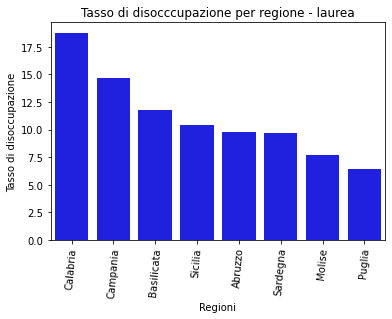

In [131]:
tassi_regioni = tassi_regioni_laurea
sns.barplot(data = tassi_regioni, x = 'Territorio', y = 'Disoccupazione', color='blue', 
    order=tassi_regioni.sort_values(by=['Disoccupazione'], ascending=False).set_index('Territorio').index).set_title('Tasso di disocccupazione per regione - laurea')
plt.xticks(rotation=85)
plt.xlabel('Regioni')
plt.ylabel('Tasso di disoccupazione')

# # Analisi di come è stato trovato l'impiego

In [163]:
a = df[(df.C59 != '   ') & (df.C59 != '997')]
a = round(a.groupby(by=['C59'])['COEFMI'].sum()/10000)
a = np.array(a)
a, np.sum(a)

(array([  366., 17951.,    26.]), 18343.0)

ValueError: too many values to unpack (expected 2)

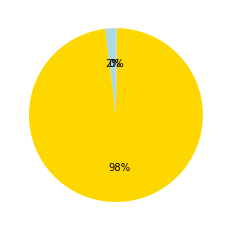

In [180]:
modalità = ['Ha trovato questo lavoro tramite un centro pubblico per l\'impiego']
labels = [r'Ha trovato lavoro tramite un centro pubblico']
colors = ['lightblue', 'gold']
patches, texts = plt.pie(sizes, colors=colors, startangle=90, autopct='%1.0f%%')
plt.legend(patches,title = labels, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, '["Ha trovato questo lavoro tramite un centro pubblico per l\'impiego"]')

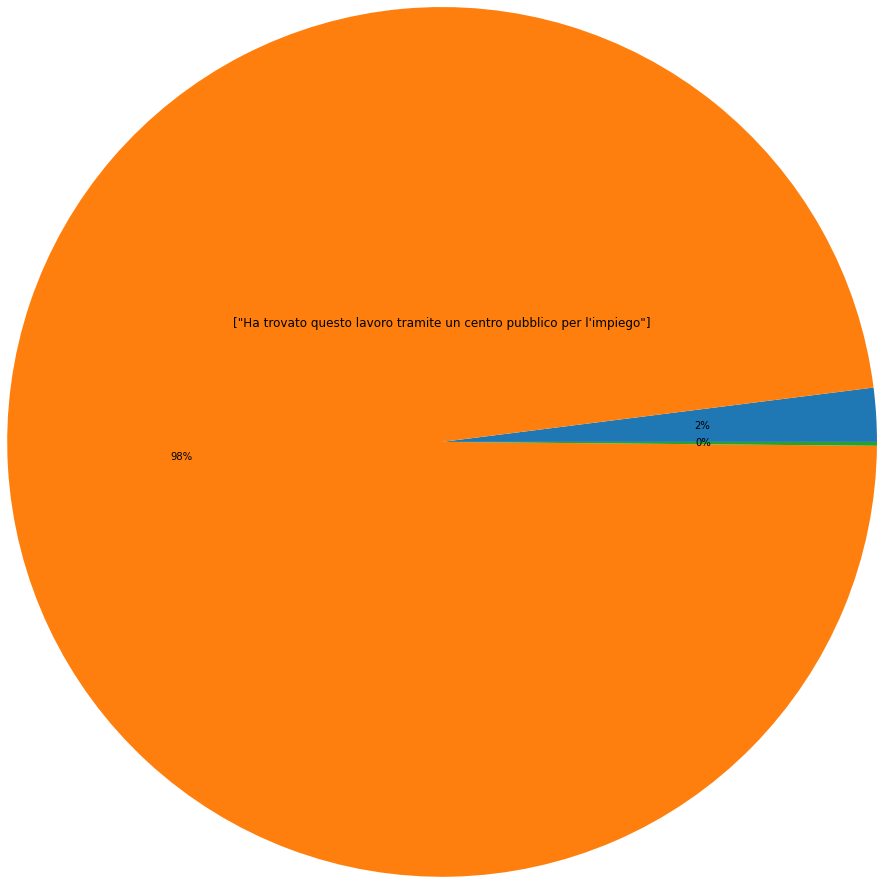

In [156]:
plt.pie(a, radius = 5, autopct='%1.0f%%')
plt.title(label= modalità)

In [52]:
a = df[df.C59AB != '   ']
a = round(a.groupby(by=['C59AB'])['COEFMI'].sum()/10000)
a = np.array(a)
a, np.sum(a)

(array([ 931., 4519., 1667., 3299., 3507.,  334.,  835.,  242.,  741.,
        3194., 3471.,  203.,   75.]),
 23018.0)

In [53]:
modalità = ['Annunci',
'Si è rivolto direttamente all\'azienda',
'Contattato dall\'azienda',
'Attraverso familiari',
'Attraverso amici o conoscenti, colleghi o ex colleghi',
'Concorso pubblico',
'Centro pubblico per l\'impiego',
'Agenzia di somministrazione',
'Scuola o ente di formazione',
'Stage o precedenti esperienze lavorative',
'Inizio di un\'attività autonoma',
'Altro metodo (specificare)',
'Non sa']

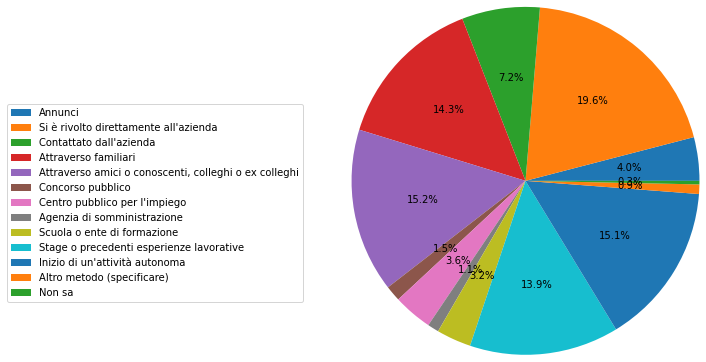

In [74]:
plt.pie(a, radius = 2, autopct='%1.1f%%')
plt.legend(labels = modalità, loc = 'right', bbox_to_anchor=(-0.5, +0.4), ncol=1)

Text(0.5, 0, 'Percentuale')

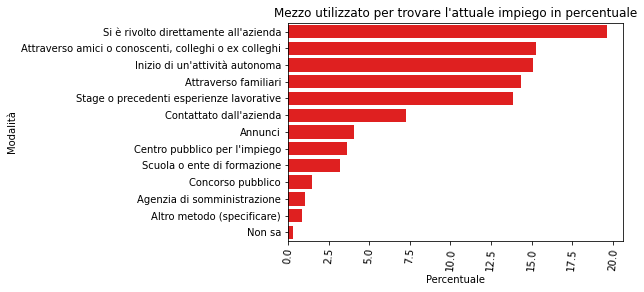

In [82]:
impiego = zip(modalità, list(a))
impiego_df = pd.DataFrame(impiego, columns=['Modalità', 'Totale'])
impiego_df

impiego_df['Percentuale'] = (impiego_df['Totale'] / np.sum(list(impiego_df['Totale']))) * 100

sns.barplot(data = impiego_df, x = 'Percentuale', y = 'Modalità', color='red', orient='h',
    order = impiego_df.groupby('Modalità')['Totale'].sum().sort_values(ascending=False).index.values
    ).set_title('Mezzo utilizzato per trovare l\'attuale impiego in percentuale')
plt.xticks(rotation=85)
plt.xlabel('Percentuale')


Text(0.5, 0, 'Percentuale')

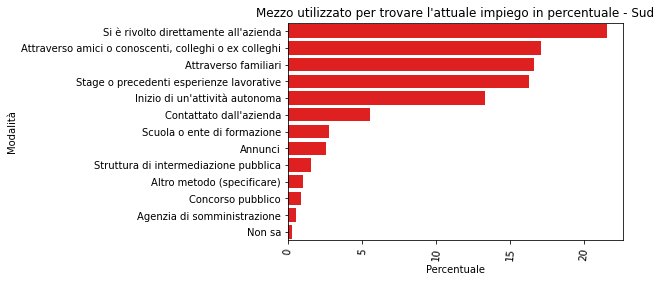

In [87]:
a = df[df.C59AB != '   ']
a = a[a.RIP5 == 4]
a = round(a.groupby(by=['C59AB'])['COEFMI'].sum()/10000)
a = np.array(a)
a, np.sum(a)


modalità = ['Annunci',
'Si è rivolto direttamente all\'azienda',
'Contattato dall\'azienda',
'Attraverso familiari',
'Attraverso amici o conoscenti, colleghi o ex colleghi',
'Concorso pubblico',
'Struttura di intermediazione pubblica',
'Agenzia di somministrazione',
'Scuola o ente di formazione',
'Stage o precedenti esperienze lavorative',
'Inizio di un\'attività autonoma',
'Altro metodo (specificare)',
'Non sa']

impiego = zip(modalità, list(a))
impiego_df = pd.DataFrame(impiego, columns=['Modalità', 'Totale'])
impiego_df

impiego_df['Percentuale'] = (impiego_df['Totale'] / np.sum(list(impiego_df['Totale']))) * 100

sns.barplot(data = impiego_df, x = 'Percentuale', y = 'Modalità', color='red', orient='h',
    order = impiego_df.groupby('Modalità')['Totale'].sum().sort_values(ascending=False).index.values
    ).set_title('Mezzo utilizzato per trovare l\'attuale impiego in percentuale - Sud')
plt.xticks(rotation=85)
plt.xlabel('Percentuale')



Text(0.5, 0, 'Percentuale')

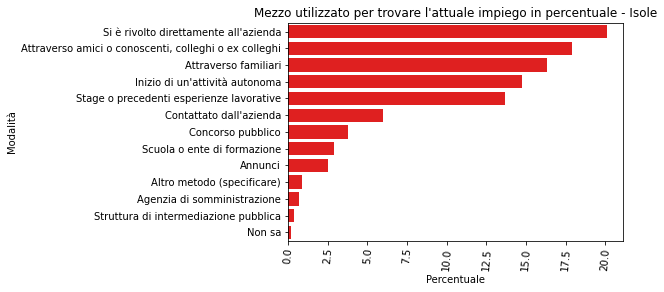

In [86]:
a = df[df.C59AB != '   ']
a = a[a.RIP5 == 5]
a = round(a.groupby(by=['C59AB'])['COEFMI'].sum()/10000)
a = np.array(a)
a, np.sum(a)


modalità = ['Annunci',
'Si è rivolto direttamente all\'azienda',
'Contattato dall\'azienda',
'Attraverso familiari',
'Attraverso amici o conoscenti, colleghi o ex colleghi',
'Concorso pubblico',
'Struttura di intermediazione pubblica',
'Agenzia di somministrazione',
'Scuola o ente di formazione',
'Stage o precedenti esperienze lavorative',
'Inizio di un\'attività autonoma',
'Altro metodo (specificare)',
'Non sa']

impiego = zip(modalità, list(a))
impiego_df = pd.DataFrame(impiego, columns=['Modalità', 'Totale'])
impiego_df

impiego_df['Percentuale'] = (impiego_df['Totale'] / np.sum(list(impiego_df['Totale']))) * 100

sns.barplot(data = impiego_df, x = 'Percentuale', y = 'Modalità', color='red', orient='h',
    order = impiego_df.groupby('Modalità')['Totale'].sum().sort_values(ascending=False).index.values
    ).set_title('Mezzo utilizzato per trovare l\'attuale impiego in percentuale - Isole')
plt.xticks(rotation=85)
plt.xlabel('Percentuale')


## Analisi soddisfazione lavoro attuale 

In [42]:
a = df[(df.C73 != '   ') & (df.C73 != 997) & (df.C73 != 996)]

a = round(a.groupby(by=['C73'])['COEFMI'].sum()/10000)
print(a)

soddisf = zip(a.keys(), list(a))
soddisf = pd.DataFrame(soddisf, columns=['Punteggio', 'Totale'])
soddisf

soddisf['Percentuale'] = (soddisf['Totale'] / np.sum(list(soddisf['Totale']))) * 100
soddisf

C73
0      234.0
1       63.0
2      117.0
3      172.0
4      326.0
5     1095.0
6     2653.0
7     4983.0
8     7313.0
9     2790.0
10    3307.0
Name: COEFMI, dtype: float64


,Punteggio,Totale,Percentuale
0,0,234.0,1.015052
1,1,63.0,0.273283
2,2,117.0,0.507526
3,3,172.0,0.746107
4,4,326.0,1.414133
5,5,1095.0,4.749924
6,6,2653.0,11.508264
7,7,4983.0,21.615408
8,8,7313.0,31.722552
9,9,2790.0,12.102546


Text(0, 0.5, 'Totale')

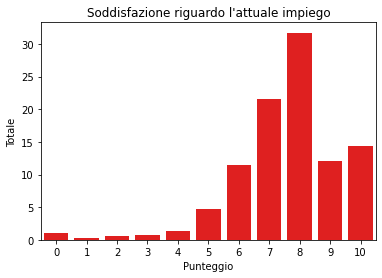

In [43]:
sns.barplot(data = soddisf, x = 'Punteggio', y = 'Percentuale', color='red', 
    ).set_title('Soddisfazione riguardo l\'attuale impiego')
plt.xlabel('Punteggio')
plt.ylabel('Totale')

C73
0       53.0
1        7.0
2       21.0
3       27.0
4       64.0
5      233.0
6      745.0
7      809.0
8     1203.0
9      348.0
10     583.0
Name: COEFMI, dtype: float64


Text(0, 0.5, 'Totale')

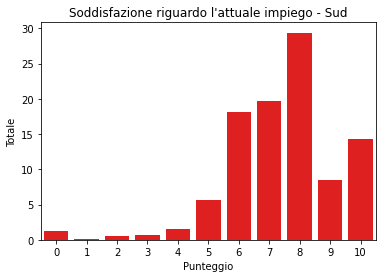

In [47]:
a = df[(df.C73 != '   ') & (df.C73 != 997) & (df.C73 != 996)]

a = a[a.RIP5 == 4]

a = round(a.groupby(by=['C73'])['COEFMI'].sum()/10000)
print(a)

soddisf = zip(a.keys(), list(a))
soddisf = pd.DataFrame(soddisf, columns=['Punteggio', 'Totale'])
soddisf['Percentuale'] = (soddisf['Totale'] / np.sum(list(soddisf['Totale']))) * 100
soddisf

sns.barplot(data = soddisf, x = 'Punteggio', y = 'Percentuale', color='red', 
    ).set_title('Soddisfazione riguardo l\'attuale impiego - Sud')
plt.xlabel('Punteggio')
plt.ylabel('Totale')

C73
0      21.0
1       7.0
2      12.0
3      20.0
4      22.0
5      87.0
6     309.0
7     409.0
8     544.0
9     194.0
10    274.0
Name: COEFMI, dtype: float64


Text(0, 0.5, 'Totale')

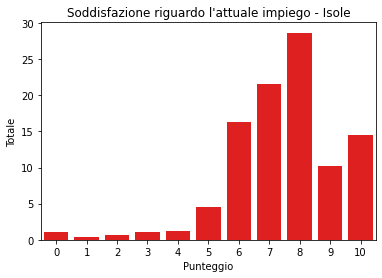

In [48]:
a = df[(df.C73 != '   ') & (df.C73 != 997) & (df.C73 != 996)]

a = a[a.RIP5 == 5]

a = round(a.groupby(by=['C73'])['COEFMI'].sum()/10000)
print(a)

soddisf = zip(a.keys(), list(a))
soddisf = pd.DataFrame(soddisf, columns=['Punteggio', 'Totale'])
soddisf['Percentuale'] = (soddisf['Totale'] / np.sum(list(soddisf['Totale']))) * 100
soddisf

sns.barplot(data = soddisf, x = 'Punteggio', y = 'Percentuale', color='red', 
    ).set_title('Soddisfazione riguardo l\'attuale impiego - Isole')
plt.xlabel('Punteggio')
plt.ylabel('Totale')

## Analisi soddisfazione attuale rispetto al guadagno

In [187]:
a = df[(df.C74 != '   ') & (df.C74 != 997) & (df.C74 != 996)]

a = round(a.groupby(by=['C74'])['COEFMI'].sum()/10000)
print(a)

soddisf = zip(a.keys(), list(a))
soddisf = pd.DataFrame(soddisf, columns=['Punteggio', 'Totale'])
soddisf

soddisf['Percentuale'] = (soddisf['Totale'] / np.sum(list(soddisf['Totale']))) * 100
soddisf

C74
0      355.0
1      122.0
2      312.0
3      436.0
4      961.0
5     2397.0
6     4776.0
7     5807.0
8     4946.0
9     1522.0
10    1373.0
Name: COEFMI, dtype: float64


,Punteggio,Totale,Percentuale
0,0,355.0,1.543009
1,1,122.0,0.530273
2,2,312.0,1.356109
3,3,436.0,1.895075
4,4,961.0,4.176990
5,5,2397.0,10.418568
6,6,4776.0,20.758899
7,7,5807.0,25.240144
8,8,4946.0,21.497805
9,9,1522.0,6.615378


C74
0       66.0
1       22.0
2       57.0
3       80.0
4      212.0
5      475.0
6     1009.0
7     1008.0
8      740.0
9      176.0
10     241.0
Name: COEFMI, dtype: float64


Text(0, 0.5, 'Totale')

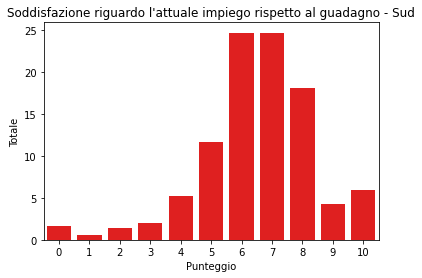

In [188]:
a = df[(df.C74 != '   ') & (df.C74 != 997) & (df.C74 != 996)]

a = a[a.RIP5 == 4]

a = round(a.groupby(by=['C74'])['COEFMI'].sum()/10000)
print(a)

soddisf = zip(a.keys(), list(a))
soddisf = pd.DataFrame(soddisf, columns=['Punteggio', 'Totale'])
soddisf['Percentuale'] = (soddisf['Totale'] / np.sum(list(soddisf['Totale']))) * 100
soddisf

sns.barplot(data = soddisf, x = 'Punteggio', y = 'Percentuale', color='red', 
    ).set_title('Soddisfazione riguardo l\'attuale impiego rispetto al guadagno - Sud')
plt.xlabel('Punteggio')
plt.ylabel('Totale')

C74
0      33.0
1      13.0
2      28.0
3      30.0
4      89.0
5     211.0
6     515.0
7     410.0
8     360.0
9      97.0
10    109.0
Name: COEFMI, dtype: float64


Text(0, 0.5, 'Totale')

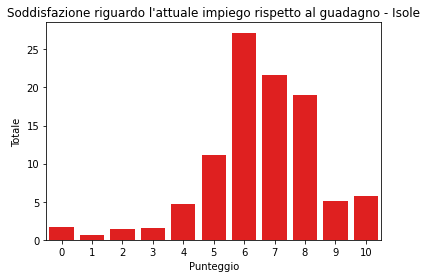

In [189]:
a = df[(df.C74 != '   ') & (df.C74 != 997) & (df.C74 != 996)]

a = a[a.RIP5 == 5]

a = round(a.groupby(by=['C74'])['COEFMI'].sum()/10000)
print(a)

soddisf = zip(a.keys(), list(a))
soddisf = pd.DataFrame(soddisf, columns=['Punteggio', 'Totale'])
soddisf['Percentuale'] = (soddisf['Totale'] / np.sum(list(soddisf['Totale']))) * 100
soddisf

sns.barplot(data = soddisf, x = 'Punteggio', y = 'Percentuale', color='red', 
    ).set_title('Soddisfazione riguardo l\'attuale impiego rispetto al guadagno - Isole')
plt.xlabel('Punteggio')
plt.ylabel('Totale')